In [25]:
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick
from adjustText import adjust_text


# Load the data (replace 'path_to_file.csv' with the correct path to your file)
summary = pd.read_csv('H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\Commodity\\Files\\summary_table_wide_ModesDir.csv')
#summary_table_wide.to_csv('H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\summary_table_wide_ModesDir.csv')

# Inspect the first few rows to ensure it contains the expected columns
print(summary.head())



   Unnamed: 0  Year   Mode Direction          Tons         Value
0           0  2015    Air        IB  62091.718290  4.321735e+08
1           1  2015    Air        OB  43442.484311  1.930021e+08
2           2  2015  Other        IB    315.536818  1.130103e+06
3           3  2015  Other        OB    161.742184  1.105508e+06
4           4  2015  Other       Thr     23.597803  1.022039e+04


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def create_circular_bar_chart(df, year, variable):
    upperLimit = 100
    lowerLimit = 30
    labelPadding = 4

    # Filter data based on the given year
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    width = 2 * np.pi / df_year.shape[0]

    # Create color_dict based on 'Direction'
    unique_directions = df_year['Direction'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_directions)))
    color_dict = dict(zip(unique_directions, colors))

    for i, row in df_year.iterrows():
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]

        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        angle = df_year[variable].rank(method='min')[i] * width
            
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]
        )

        rotation = np.rad2deg(angle)
        alignment = "right" if np.pi/2 <= angle < 3*np.pi/2 else "left"
        ax.text(
            x=angle, 
            y=lowerLimit + height + labelPadding, 
            s=f'{mode} {direction}', 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor"
        )

    # Create legend based on 'Direction'
    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in unique_directions]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Freight Summary for {year} - {variable}')
    plt.show()


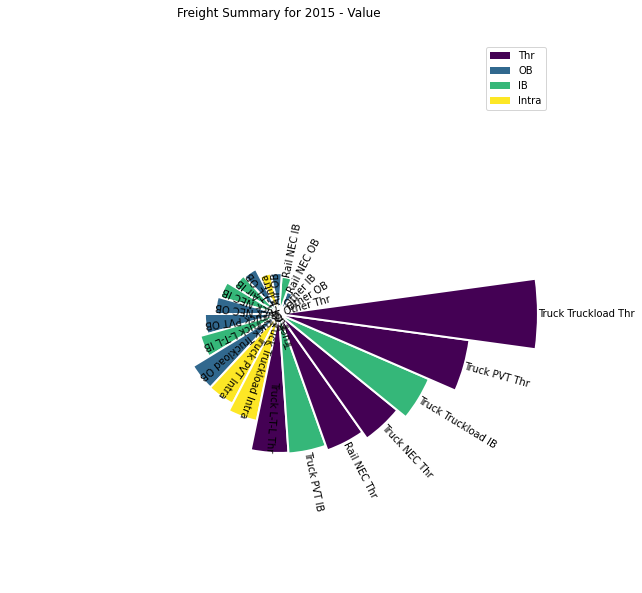

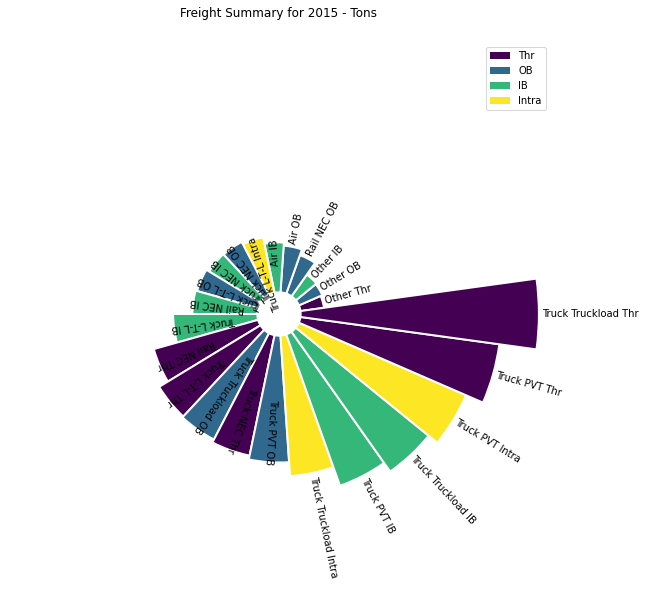

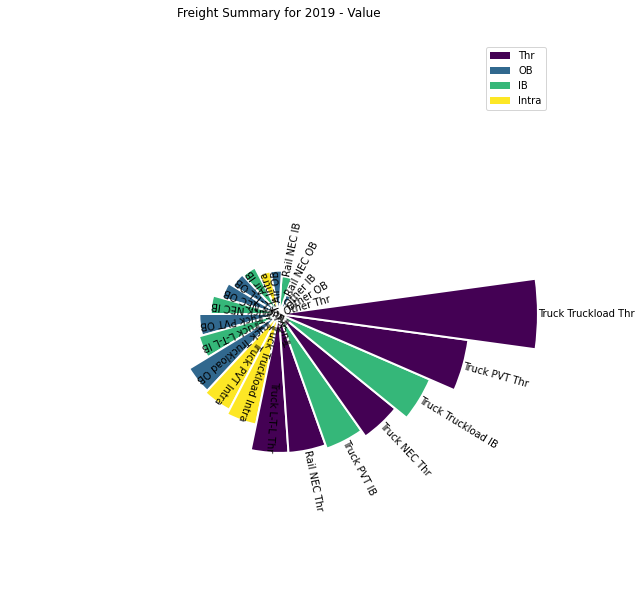

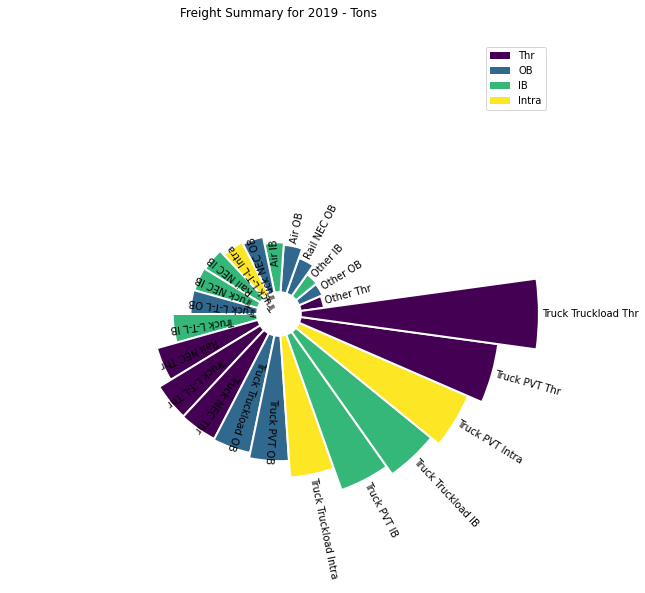

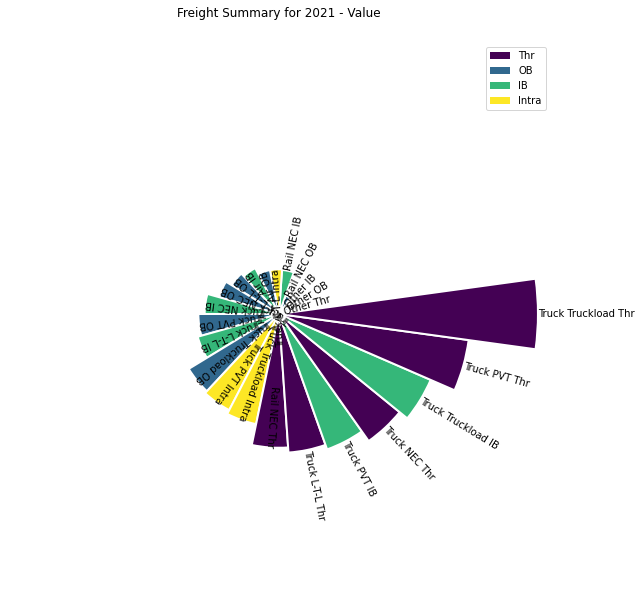

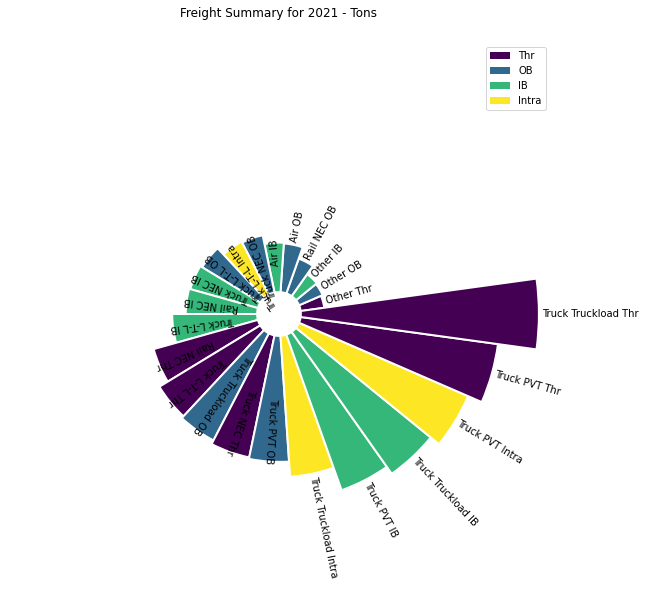

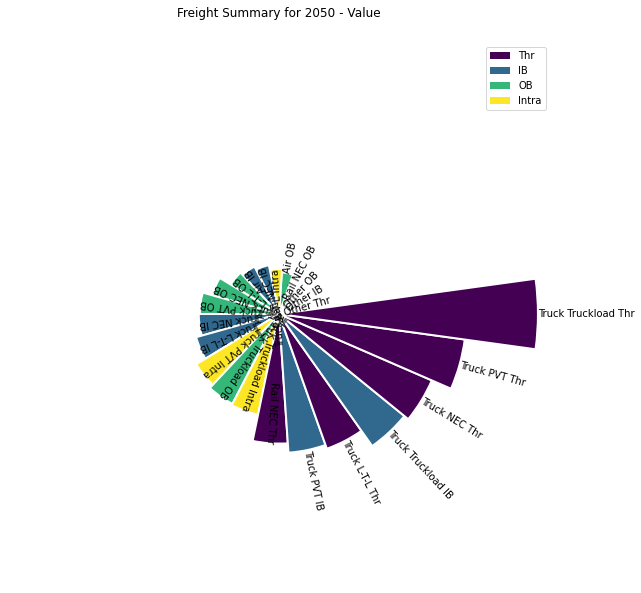

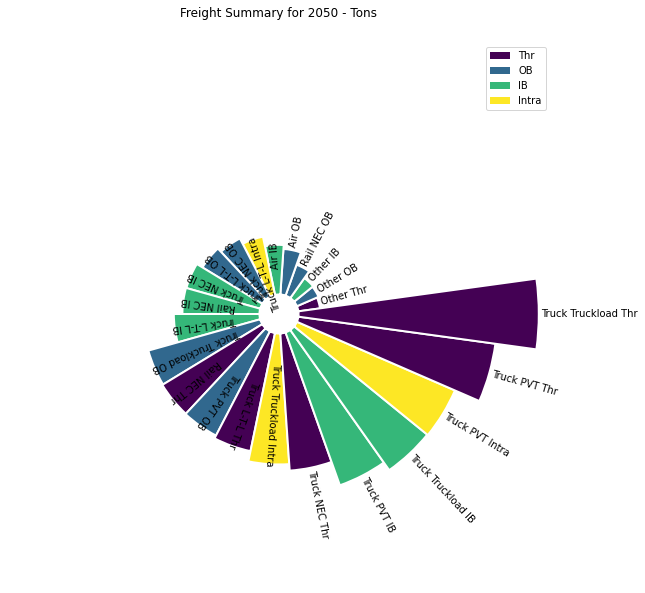

In [27]:
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart(summary, year, 'Value')
    create_circular_bar_chart(summary, year, 'Tons')


In [91]:
from matplotlib.font_manager import FontProperties
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

font = FontProperties(family='Baskerville Old Face')

def create_circular_bar_chart1(df, year, variable):
    upperLimit = 100
    lowerLimit = 80 if variable == 'Tons' else 750
    labelOffset = 25 if variable == 'Tons' else 50  # Adjust these values to control the distance of labels from the bars
    
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    width = 2 * np.pi / df_year.shape[0]

    directions = df['Direction'].unique()
    colors = sns.color_palette('Set3', len(directions))
    color_dict = {direction: color for direction, color in zip(directions, colors)}

    for i, row in df_year.iterrows():
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]

        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        angle = df_year[variable].rank(method='min')[i] * width
            
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]
        )

        rotation = np.rad2deg(angle)
        ax.text(
            x=angle, 
            y=upperLimit + labelOffset,  # Set the radius for the label based on the upper limit plus offset
            s=f'{mode} {direction}', 
            ha='center', 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor",
            fontproperties=font,
            fontsize=15
        )

    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in directions]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.8, 0.7), prop=font, fontsize=30)

    plt.suptitle(f'Freight Summary for {year} - {variable}', fontproperties=font, y=0.75, fontsize=20)
    plt.show()


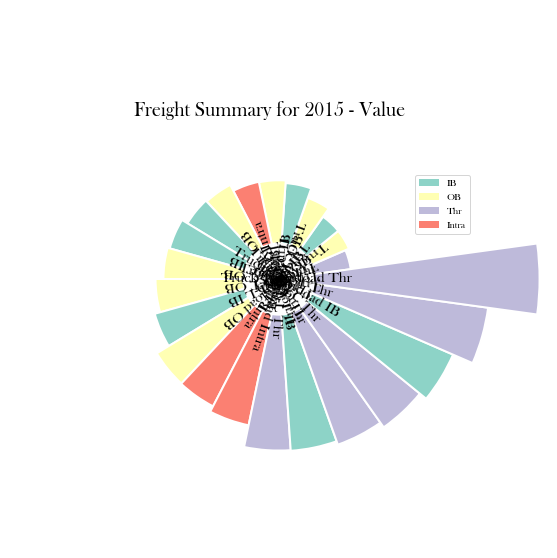

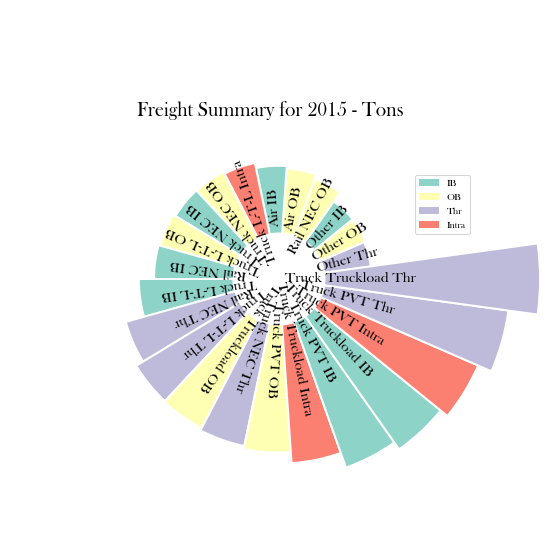

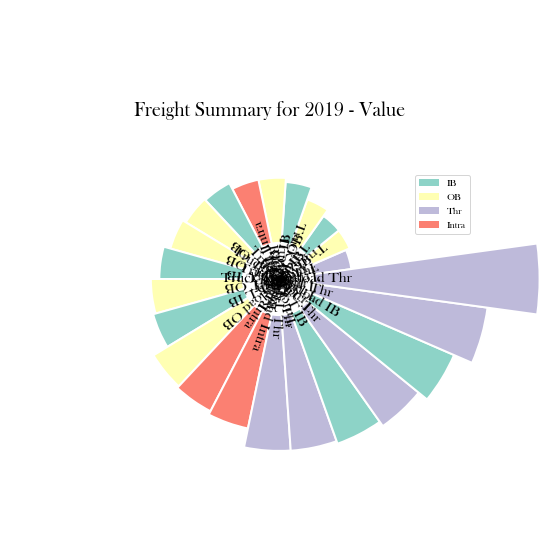

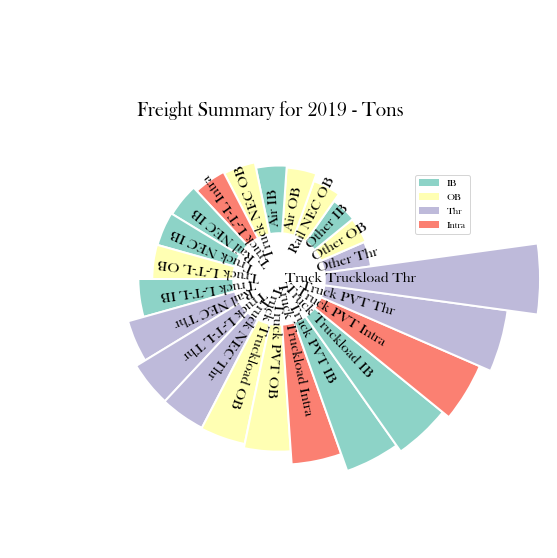

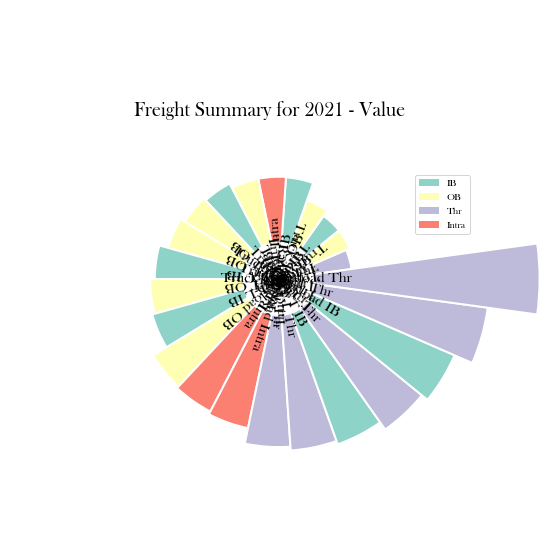

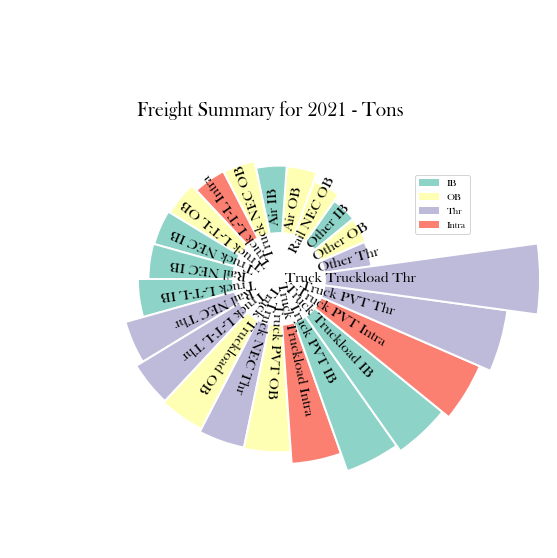

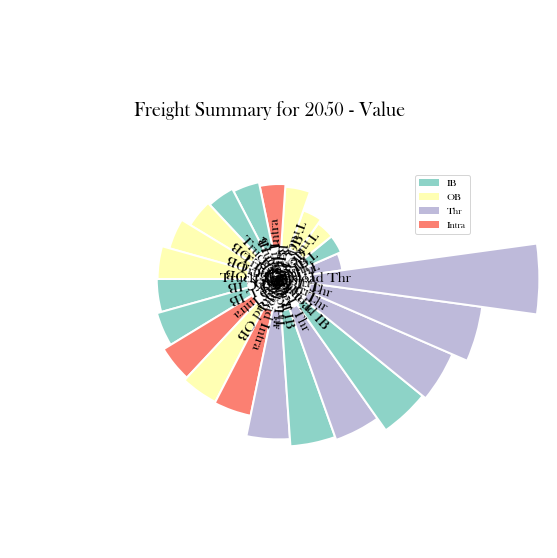

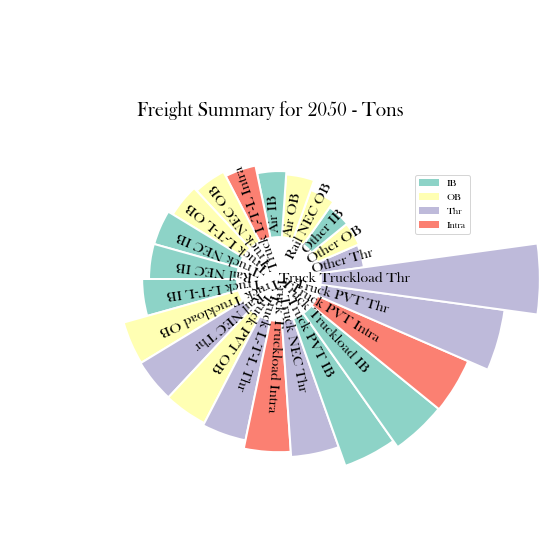

In [92]:
# Create circular bar charts for each year
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart1(summary, year, 'Value')
    create_circular_bar_chart1(summary, year, 'Tons')


In [121]:
from matplotlib.font_manager import FontProperties
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

font = FontProperties(family='Baskerville Old Face')

def create_circular_bar_chart1(df, year, variable):
    upperLimit = 100
    lowerLimit = 100 if variable == 'Tons' else 750
    
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    width = 2 * np.pi / df_year.shape[0]

    directions = df['Direction'].unique()
    colors = sns.color_palette('Set3', len(directions))
    color_dict = {direction: color for direction, color in zip(directions, colors)}

    for i, row in df_year.iterrows():
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]

        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        angle = df_year[variable].rank(method='min')[i] * width
            
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]
        )

        rotation = np.rad2deg(angle)
        alignment = "right" if np.pi/2 <= angle < 3*np.pi/2 else "left"
        ax.text(
            x=angle, 
            y=lowerLimit + height + 50, 
            s=f'{mode} {direction}', 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor",
            fontproperties=font,
            fontsize = 15
        )

    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in directions]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(.8, 0.7), prop=font, fontsize = 30)

    plt.suptitle(f'Freight Summary for {year} - {variable}', fontproperties=font, y=0.75, fontsize = 20)
    plt.show()

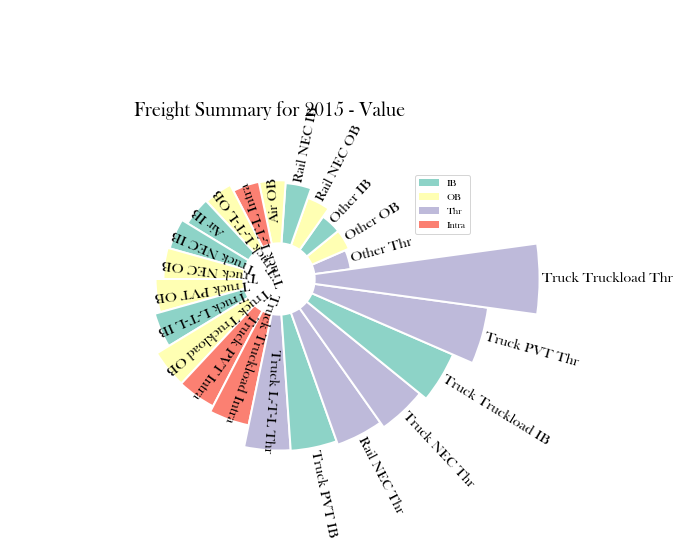

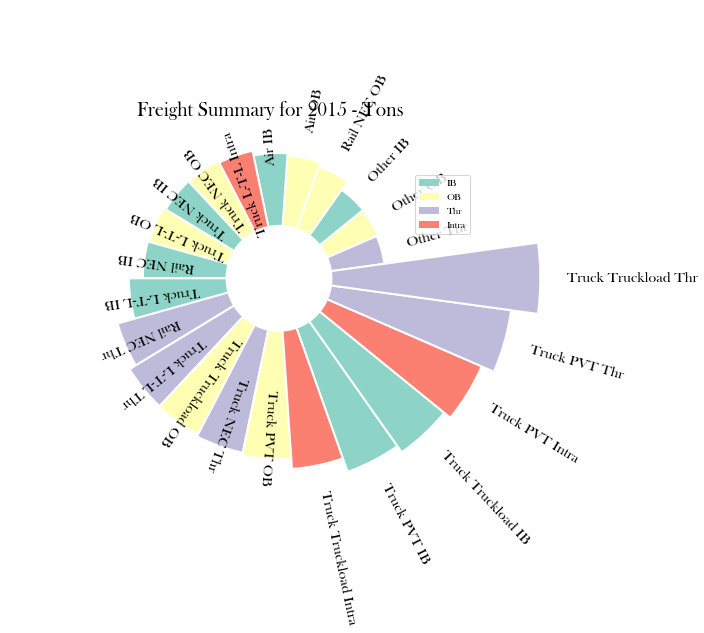

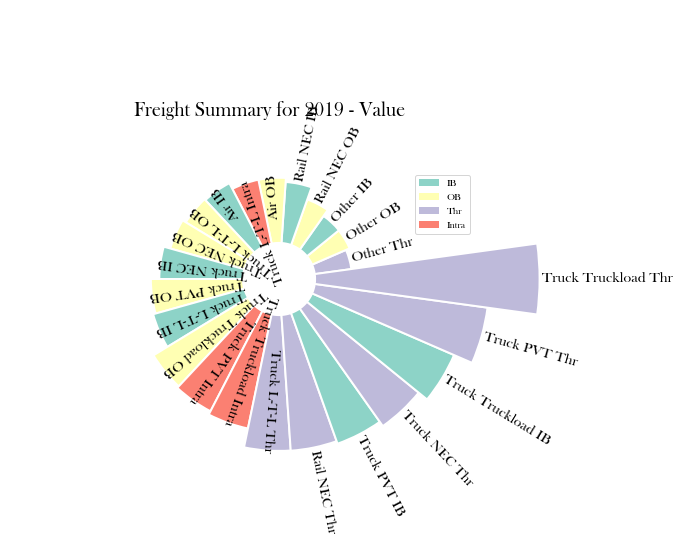

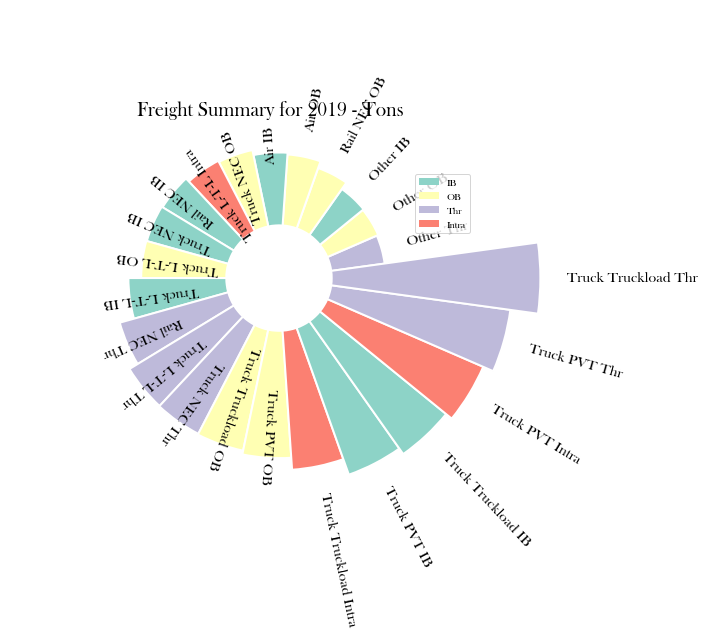

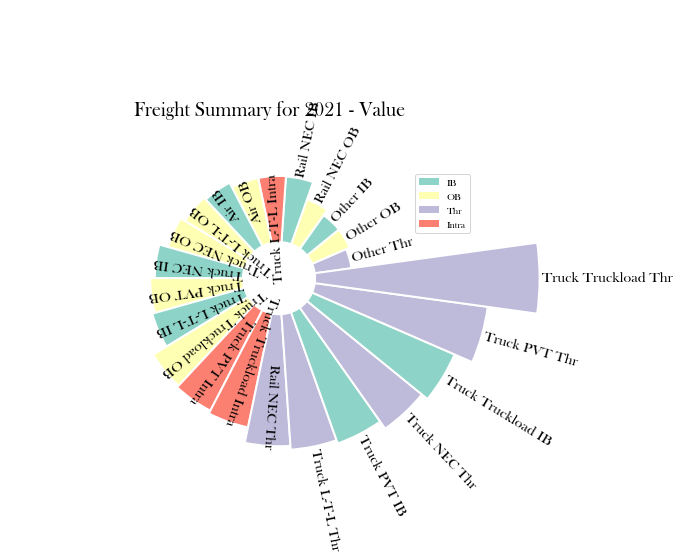

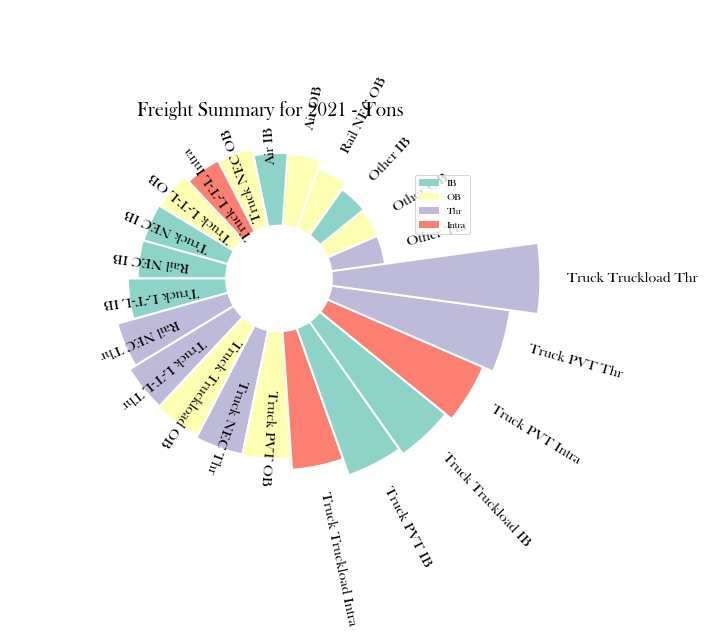

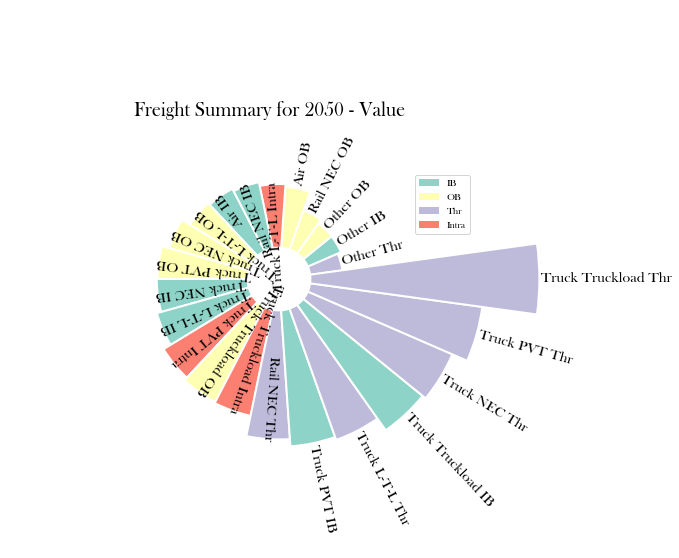

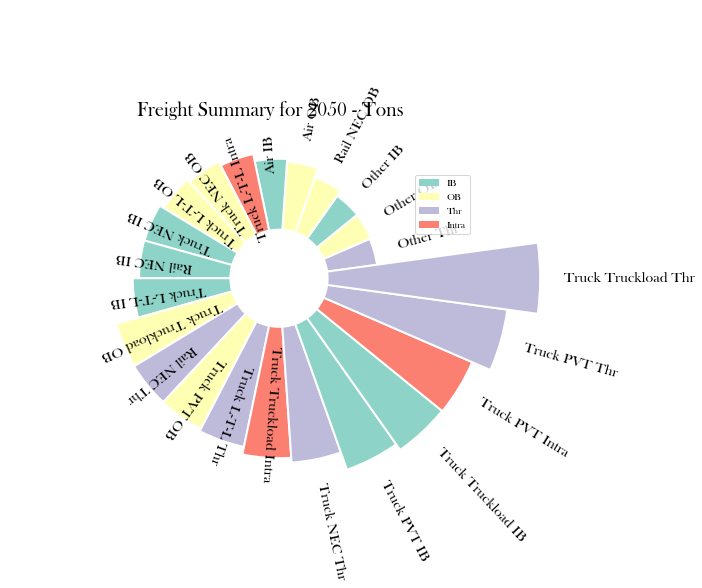

In [122]:
# Create circular bar charts for each year
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart1(summary, year, 'Value')
    create_circular_bar_chart1(summary, year, 'Tons')


In [150]:
from matplotlib.font_manager import FontProperties
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

font = FontProperties(family='Baskerville Old Face', size = 13)

def create_circular_bar_chart1(df, year, variable):
    upperLimit = 100
    lowerLimit = 100 if variable == 'Tons' else 750
    labelPadding = 10  # You can adjust this value to control the padding between labels and bars
    
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    width = 2 * np.pi / df_year.shape[0]

    directions = df['Direction'].unique()
    colors = sns.color_palette('Set3', len(directions))
    color_dict = {direction: color for direction, color in zip(directions, colors)}

    for i, row in df_year.iterrows():
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]

        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        angle = df_year[variable].rank(method='min')[i] * width
            
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]
        )

        rotation = np.rad2deg(angle)
        labelRadius = lowerLimit + height + labelPadding  # Calculate the radial distance for each label
        ax.text(
            x=angle, 
            y=labelRadius,
            s=f'{mode} {direction}', 
            ha='center',  # Center alignment
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor",
            fontproperties=font,
            fontsize=15
        )

    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in directions]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.8, 0.7), prop=font, fontsize=25)

    plt.suptitle(f'{variable} by Modes and Direction {year}', fontproperties=font, y=0.8, fontsize=25)
    plt.show()


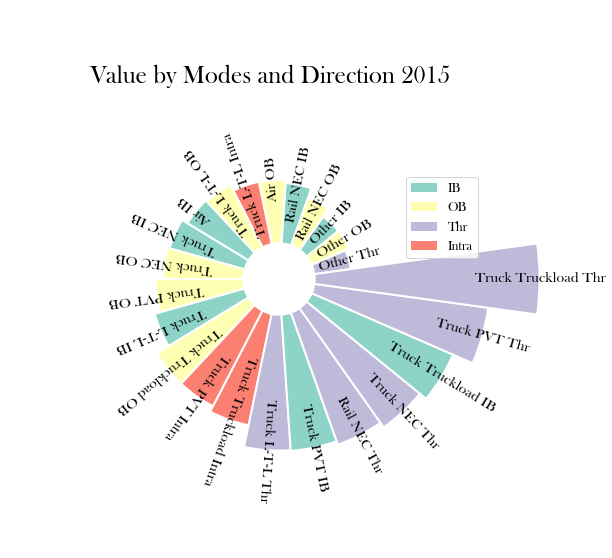

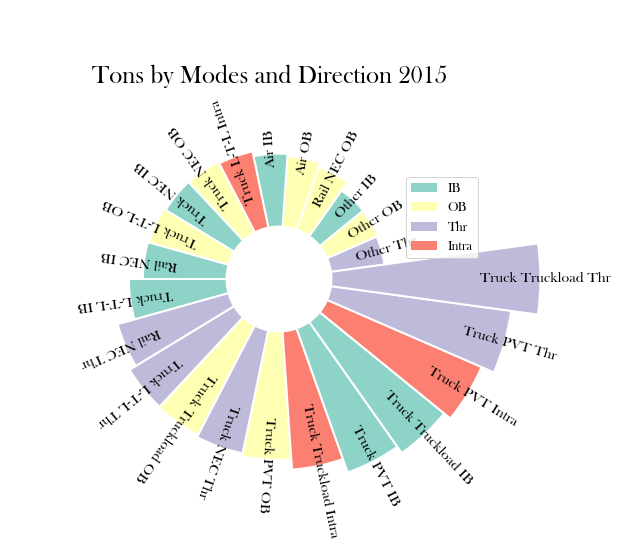

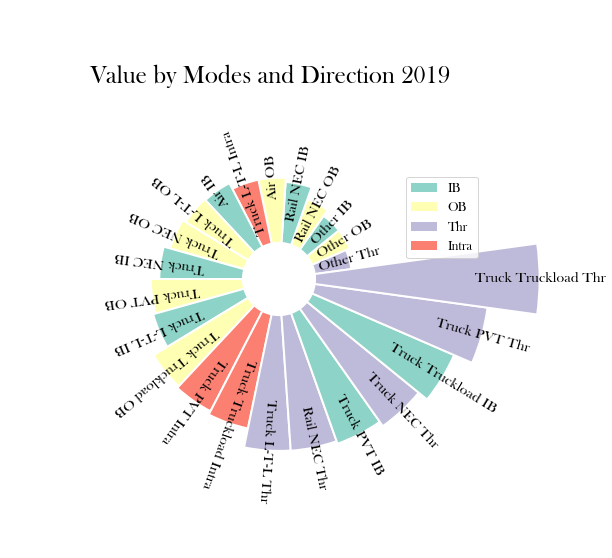

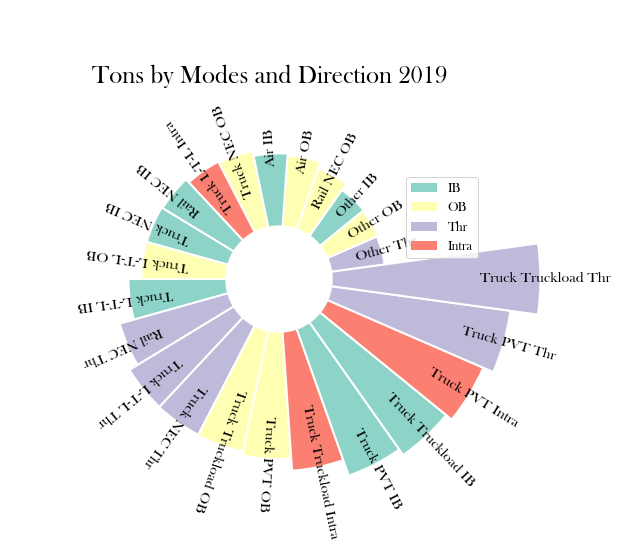

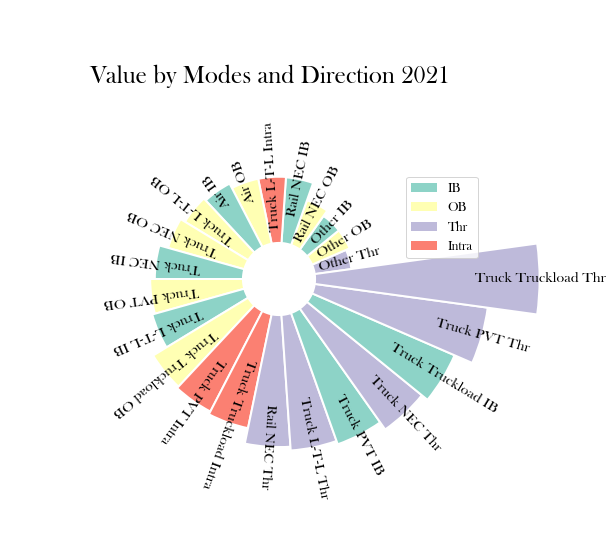

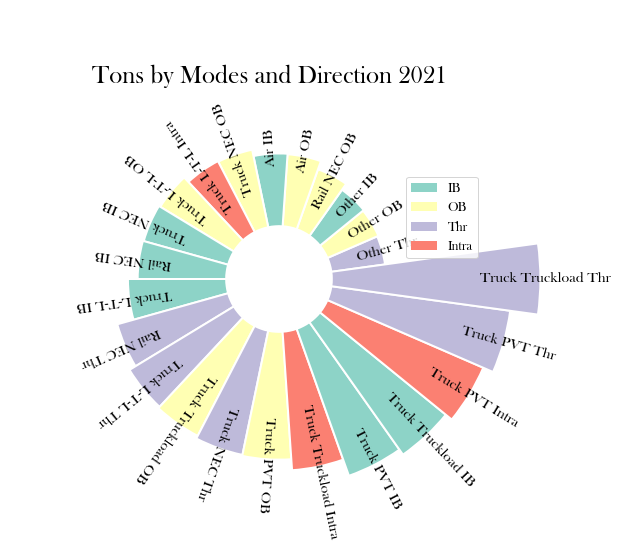

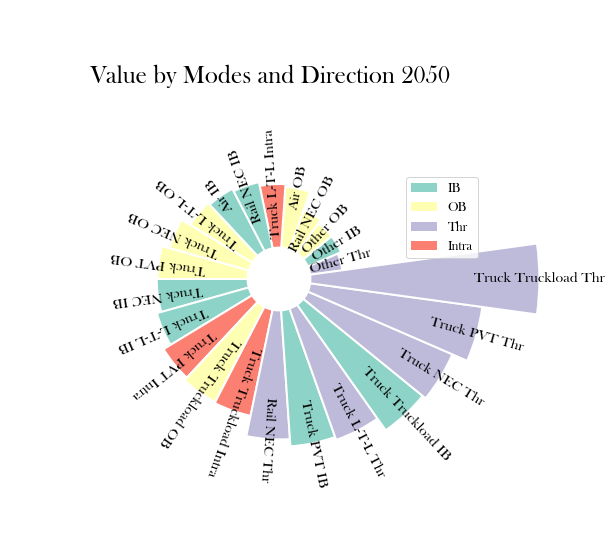

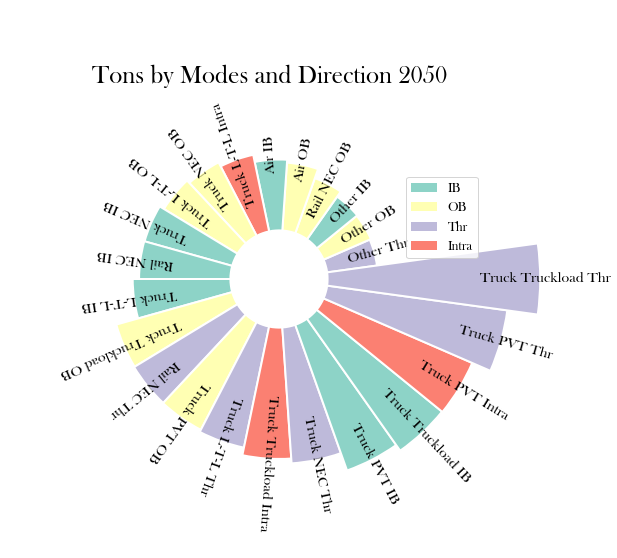

In [151]:
# Create circular bar charts for each year
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart1(summary, year, 'Value')
    create_circular_bar_chart1(summary, year, 'Tons')
